<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [2]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 162.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 182.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 125.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 143.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 181.8 MB/s eta 0:00:00


Import pandas module


In [30]:
import pandas as pd



Import matplotlib


In [4]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [7]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [ ]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [11]:
## Write your code here\
duplicated_rows = df[df.duplicated()]
len(duplicated_rows)

20

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [22]:
## Write your code here
# Identify duplicate rows based on selected columns
duplicates = df[df.duplicated(subset=['MainBranch', 'Employment', 'RemoteWork'], keep=False)]

# Show first few duplicate rows
print("Duplicate rows based on MainBranch, Employment, and RemoteWork:")
display(duplicates.head())

# Group by the columns used to define duplicates
grouped = duplicates.groupby(['MainBranch', 'Employment', 'RemoteWork'])

# Count unique values of each column within each group
unique_counts = grouped.nunique()

# Show the result
print("Number of unique values per column within duplicate groups:")
display(unique_counts.head())
# Check which columns are identical in each group
identical_columns_summary = (unique_counts == 1).sum().sort_values(ascending=False)

print("Columns most frequently identical across duplicate groups:")
display(identical_columns_summary)




Duplicate rows based on MainBranch, Employment, and RemoteWork:


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


Number of unique values per column within duplicate groups:


ResponseId  \
MainBranch                     Employment                              RemoteWork                                         
I am a developer by profession Employed, full-time                     Hybrid (some remote, some in-person)       15286   
                                                                       In-person                                   7118   
                                                                       Remote                                     12191   
                               Employed, full-time;Employed, part-time Hybrid (some remote, some in-person)          78   
                                                                       In-person                                     25   

                                                                                                             Age  \
MainBranch                     Employment                              RemoteWork                                  
I am a developer by profession Employed, full-time                     Hybrid (some remote, some in-person)    8   
                                                                       In-person                               8   
                                                                       Remote                                  8   
                               Employed, full-time;Employed, part-time Hybrid (some remote, some in-person)    5   
                                                                       In-person                               2   

                                                                                                             Check  \
MainBranch                     Employment                              RemoteWork                                    
I am a developer by profession Employed, full-time                     Hybrid (some remote, some in-person)      1   
                                                                       In-person                                 1   
                                                                       Remote                                    1   
                               Employed, full-time;Employed, part-time Hybrid (some remote, some in-person)      1   
                                                                       In-person                                 1   

                                                                                                             CodingActivities  \
MainBranch                     Employment                              RemoteWork                                               
I am a developer by profession Employed, full-time                     Hybrid (some remote, some in-person)                90   
                                                                       In-person                                           79   
                                                                       Remote                                              87   
                               Employed, full-time;Employed, part-time Hybrid (some remote, some in-person)                29   
                                                                       In-person                                           16   

                                                                                                             EdLevel  \
MainBranch                     Employment                              RemoteWork                                      
I am a developer by profession Employed, full-time                     Hybrid (some remote, some in-person)        8   
                                                                       In-person                                   8   
                                                                       Remote                                      8   
                               Employed, full-time;Employed, part-time Hybrid (some remote, some in-per

Columns most frequently identical across duplicate groups:


Check                    319
ICorPM                    97
AIThreat                  88
SOAccount                 85
AINextLess integrated     76
                        ... 
YearsCodePro               8
TechEndorse                8
BuyNewTool                 7
CodingActivities           1
ResponseId                 0
Length: 111, dtype: int64

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


/tmp/ipykernel_300/2996962986.py:29: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


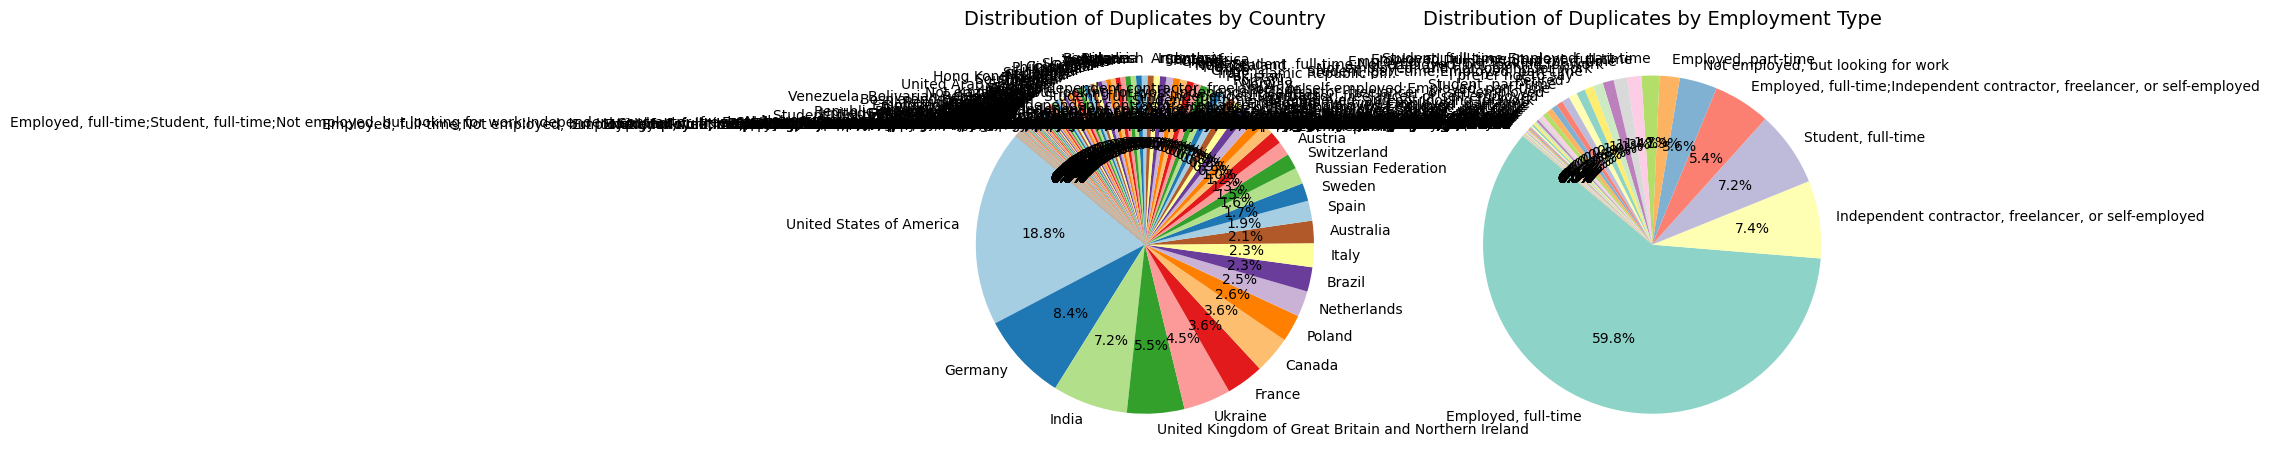

In [34]:
## Write your code here
# Count duplicates by Country and Employment
country_counts = duplicates['Country'].value_counts()
employment_counts = duplicates['Employment'].value_counts()

# Create figure with 2 pie charts
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Pie chart 1 — Country
axes[0].pie(
    country_counts,
    labels=country_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
axes[0].set_title("Distribution of Duplicates by Country", fontsize=14)

# Pie chart 2 — Employment
axes[1].pie(
    employment_counts,
    labels=employment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)
axes[1].set_title("Distribution of Duplicates by Employment Type", fontsize=14)

plt.tight_layout()
plt.show()



### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [35]:
## Write your code here
# List of columns to define uniqueness
key_columns = ['MainBranch', 'Employment', 'RemoteWork']

# Remove duplicates based on these columns
df_unique = df.drop_duplicates(subset=key_columns, keep='first')

# Print results
print(f"Original dataset size: {len(df)}")
print(f"Dataset after strategic duplicate removal: {len(df_unique)}")
print(f"Duplicates removed: {len(df) - len(df_unique)}")


Original dataset size: 65457
Dataset after strategic duplicate removal: 561
Duplicates removed: 64896


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
